# Team “We Tried”
                                                                                            
                
Bapuji Satyala (U61600601)                                                                                           
                                                                                        



# Problem Statement - Addressing Workforce Productivity Challenges in the Apparel Industry


In today's globalized industrial landscape, the apparel industry emerges as a prime aspect of modern manufacturing. With a multitude of manual operations and a substantial workforce, the performance of employees within the realm of clothing manufacturing holds the key to meeting the ever-expanding global demand for textile products. It is no wonder, then, that decision-makers in the apparel sector place great emphasis on the monitoring, assessment, and prediction of workforce productivity. This profound interest stems from the crucial role played by employee performance in the timely and efficient production and delivery of clothing, making it a linchpin of success in this dynamic industry.

Our exploration of this intricate landscape seeks to unearth the myriad factors that exert their influence on worker productivity. This comprehensive endeavor takes into account every conceivable aspect that plays a role in determining the efficiency of factory teams. Through data analysis and careful examination, we aim to shed light on the critical factors that can significantly enhance workforce performance. In doing so, we endeavor to pave the way for improved profitability and lasting success for apparel companies, providing them with valuable insights to optimize their operations in a highly competitive market.






# Plan of Action

0. Importing Required Libraries
1. Data Exploration and Preprocessing
2. Training and Standardization
3. Modeling
4. Hyperparameter Tuning
5. Summary/Analysis

### 0. Importing Required Libraries

In [644]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from imblearn.over_sampling import ADASYN





* We import Pandas for data handling and NumPy for numerical operations.

* We bring in tools from scikit-learn for machine learning, like model selection, data imputation, and metrics calculation.

* For handling class imbalance in the data, we import methods from the "imblearn" library.

* To prevent unnecessary warning messages from being displayed, we turn off warnings temporarily.

* We choose to use three different machine learning models: Logistic Regression, Decision Tree Classifier, and Support Vector Classifier (SVC).

* We import metrics like mean absolute error, mean squared error, R-squared, and accuracy score to assess how well our models perform.

* To address the issue of class imbalance in our dataset, we import techniques like ADASYN from the "imblearn" library.









### 1. Data Exploration and Preprocessing

### Loading the Data

The dataset is being loaded using pandas dataframe using the read csv funtion.

In [645]:
df=pd.read_csv("garments_worker_productivity.csv")

In [646]:
df.head(5)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


The df.head function is used to get a glance of the data set and to ensure that the data is properly loaded.

### Exploring Rows and Columns 

In [647]:
df.shape

(1197, 15)

the df.shape funciton is used to identify the total number of instances(rows) and columns in the dataframe. The DataFrame contains 1197 rows and 15 columns of data


In [648]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437



The overall statistical information of the Dataset is derived using df.describe() function .

- "Count" shows the number of non-empty entries in each column. Some columns have missing data.

- "Mean" is the average value for each column, providing a central tendency measure.

- "Std" is the standard deviation, indicating data variability in each column.

- "Min," "25%," "50%," "75%," and "Max" describe the minimum, quartiles, median, and maximum values in each column, offering insights into data distribution and range.

In [649]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

The info function defines the data types, total count values of the various features from the dataframe.

In [650]:
df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object


df.dtypes provides information about the data types of each column in the DataFrame. 


* "object" data type represents columns with text or string values such as classification data types or specific formats such as Date format etc.

* "int64" data type indicates columns storing integer values.

* "float64" data type is used for columns containing decimal or floating-point numbers.



### Identifying and Handling Any Missing Data

"Identifying and Handling Missing Data" is the process of addressing and managing incomplete or missing information in a dataset.

 The objective is to improve data quality by implementing techniques such as imputing missing values or determining how to address them, which can include methods like filling in missing data with statistical averages, removing rows with missing data.

In [651]:
df.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

* This function helps identify columns with missing data, which is important for data quality assessment and addressing missing values in data analysis.
As we can see there are null values in 'wip' column

In [652]:
df['wip'].isna().mean()*100

42.272347535505425

We can see that the "wip" column has over 42% null values, which is a substantial amount of data that will have a significant impact on the model. Attempting to improve data quality by imputing missing values using mean or other approaches may not be suitable. In this scenario, dropping the column should be the best option.


### Continous features

In [653]:
df_clean=df[['over_time','smv','incentive','targeted_productivity']]

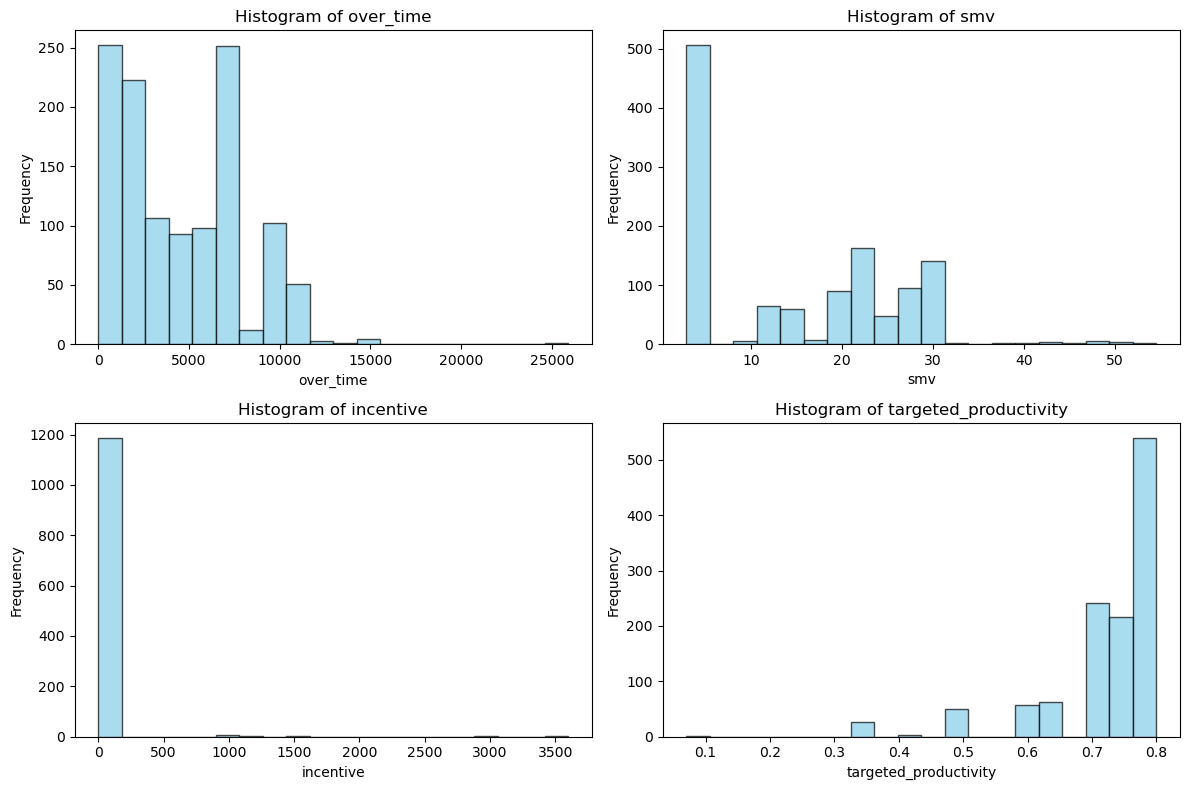

In [654]:
import matplotlib.pyplot as plt

# Define the number of rows and columns for subplots
num_rows = 2
num_cols = 2

# Define the continuous columns to be plotted
cont_cols = ['over_time', 'smv', 'incentive', 'targeted_productivity']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))

# Customize histogram appearance
hist_kwargs = {
    'color': 'skyblue',
    'edgecolor': 'black',
    'alpha': 0.7
}

# Loop through the continuous columns and create histograms
for i, col in enumerate(cont_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols    
    ax = axes[row_idx, col_idx]
    ax.hist(df[col], bins=20, **hist_kwargs)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    
# Remove any empty subplots
for i in range(len(cont_cols), num_rows * num_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    fig.delaxes(axes[row_idx, col_idx])

# Adjust subplot layout
fig.tight_layout()

# Display the plots
plt.show()


Based on the Histograms we can make the below predictions :-

- 'over_time': 

According to the 'over_time' statistics, the most typical overtime duration ranges between (-25.92 to 1296.0] minutes, with 252 workers working up to 1296 minutes. In contrast, as evidenced by the lower frequencies in other duration intervals, fewer workers have prolonged their overtime beyond this range. Furthermore, no counts are shown in the final six intervals, meaning that none of the workers surpassed the specified overtime durations.

- 'smv':

The most common SMV (Sewing Machine Workload) scores range from 2.847 to 5.483, with 506 workers having SMV ratings in this range. This means that the vast majority of the workers in the dataset have SMV scores in this range. In contrast, as demonstrated by the lower frequencies in other score intervals, fewer workers have SMV scores that fall outside of this range. The latter two periods had nil counts, indicating that none of the workers had SMV values that exceeded these limits.

- 'incentive'

With 1187 observations, the majority of the data is focused in the range of -3.601 to 180. This implies that the bulk of incentives are of little value. In comparison, there are only a few occurrences outside of this range, demonstrating that high-value incentives are uncommon in the dataset.

### Categorical Features

In [655]:
df_clean1=df[['quarter', 'department', 'day', 'team']]

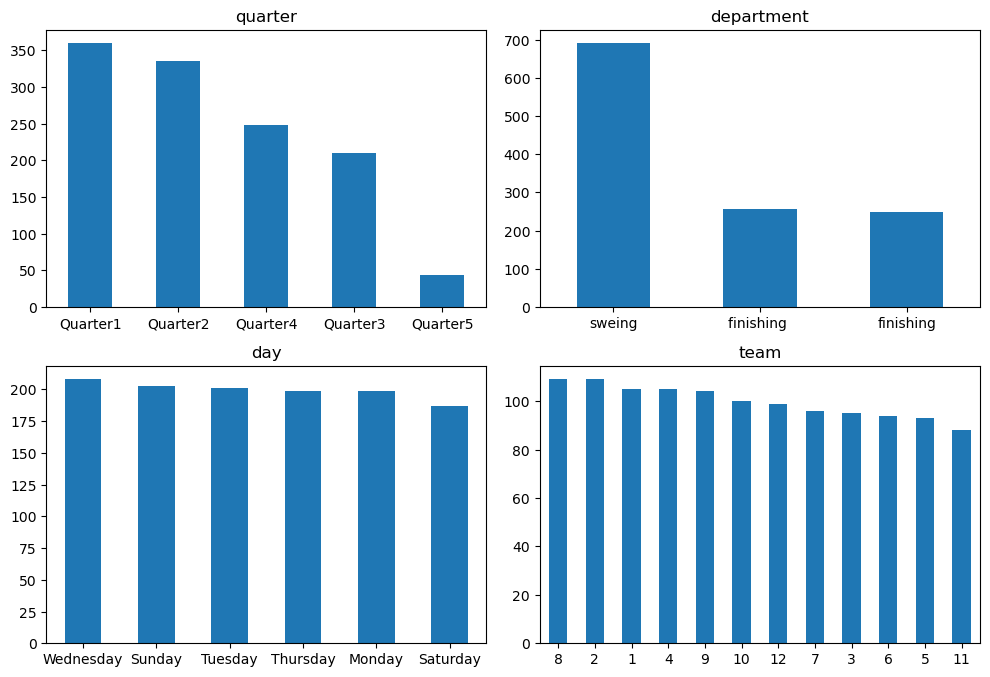

In [656]:
cat_cols = ['quarter', 'department', 'day', 'team']
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    if col in df_clean1:
        df_clean1[col].value_counts().plot(kind='bar', ax=axes[i])
        axes[i].set_title(col)
        axes[i].tick_params(axis='x', labelrotation=0)
    else:
        print(f"Column '{col}' not found in df_clean.")

# Remove unused axes
for j in range(len(cat_cols), len(axes.flat)):
    fig.delaxes(axes.flat[j])

plt.tight_layout()
plt.show()


- As we can see from the graph for quarter column has 5 unique values quarter1-5 in descending order.
- department has more sewing values more than finishing values.
- the records in days of the week seems to be evenly distributed but wednesday has a little edge over other days
- for teams 8,2 have more more records and team 11 having the least

### Coverting the column names into Uppercase  

In [657]:
df.columns=df.columns.str.upper()

* We are modifying the column names in the DataFrame df to uppercase letters to ensure uniformity in column naming and simplifies data operations.

In [658]:
df.columns

Index(['DATE', 'QUARTER', 'DEPARTMENT', 'DAY', 'TEAM', 'TARGETED_PRODUCTIVITY',
       'SMV', 'WIP', 'OVER_TIME', 'INCENTIVE', 'IDLE_TIME', 'IDLE_MEN',
       'NO_OF_STYLE_CHANGE', 'NO_OF_WORKERS', 'ACTUAL_PRODUCTIVITY'],
      dtype='object')

* We are verifying the column names in the DataFrame after they have been changed to uppercase, ensuring the successful conversion.

* It helps confirm that all column names are now in uppercase letters, maintaining consistency for further data processing or analysis.

### Identifying any categorical data in the dataframe and Loading Correctly

* We identify and recognize columns or variables in the DataFrame that contain categorical data, such as text labels, categories, or nominal values.

* It ensures that these categorical data are treated correctly and loaded in a way that machine learning algorithms or data analysis tools can effectively handle them. This may involve encoding categorical data into numerical format, as many algorithms require numerical input.

In [659]:
uniques=df.nunique()
uniques

DATE                      59
QUARTER                    5
DEPARTMENT                 3
DAY                        6
TEAM                      12
TARGETED_PRODUCTIVITY      9
SMV                       70
WIP                      548
OVER_TIME                143
INCENTIVE                 48
IDLE_TIME                 12
IDLE_MEN                  10
NO_OF_STYLE_CHANGE         3
NO_OF_WORKERS             61
ACTUAL_PRODUCTIVITY      879
dtype: int64

This output represents the count of unique values in each column of the DataFrame.

* "DATE" column has 59 unique values.
* "QUARTER" column has 5 unique values.
* "DEPARTMENT" column has 3 unique values.
* "DAY" column has 6 unique values.
* "TEAM" column has 12 unique values.
* "TARGETED_PRODUCTIVITY" column has 9 unique values.
* "SMV" column has 70 unique values.
* "WIP" column has 548 unique values.
* "OVER_TIME" column has 143 unique values.
* "INCENTIVE" column has 48 unique values.
* "IDLE_TIME" column has 12 unique values.
* "IDLE_MEN" column has 10 unique values.
* "NO_OF_STYLE_CHANGE" column has 3 unique values.
* "NO_OF_WORKERS" column has 61 unique values


In [660]:
df['QUARTER'].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

* This output shows the distinct quarters or categories present in the "QUARTER" column, and it's useful for understanding the variety of data within that specific column.


In [661]:
df['QUARTER'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: QUARTER, dtype: int64

In [662]:
q_df = df.loc[df['QUARTER'] == 'Quarter5']
q_df['DATE'].value_counts()

1/31/2015    24
1/29/2015    20
Name: DATE, dtype: int64

Normally, a month has four quarters, but in January 2015, quarter 5 only has two days, the 29th and 31st of January, for a total value of 44. Because producing a separate column for just a handful of data would be inefficient when using get dummies on the quarter column, we will merge this quarter 5 into quarter 4.  

In [663]:
df['QUARTER']=df['QUARTER'].str.replace('Quarter5', 'Quarter4')
df['QUARTER'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    292
Quarter3    210
Name: QUARTER, dtype: int64

Now we can see that the quarter 5 has been merged with quarter 4 and sumed to 292 values rather than previous 248.

In [664]:
df['DEPARTMENT'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

* This reveals the distinct department classifications present in the "DEPARTMENT" column.
* As there is  subtle differences in the spelling and formatting of "finishing" which needs Data Cleaning. Also the sewing is mispselled as sweing and should be corrected. 


In [665]:
df=df.replace('sweing','sewing')

In [666]:
df['DEPARTMENT'].unique()

array(['sewing', 'finishing ', 'finishing'], dtype=object)

In [667]:
df['DEPARTMENT']=df['DEPARTMENT'].str.strip()

 As there is an extra space in the "finishing"
 * we are removing extra spaces or unwanted characters at the beginning or end of the department names using str.strip()

In [668]:
df['DEPARTMENT'].value_counts()

sewing       691
finishing    506
Name: DEPARTMENT, dtype: int64

Now the data is clear with 2 classifications in Deparment column - sewing and finishing.

In [669]:
df['TARGETED_PRODUCTIVITY']=df['TARGETED_PRODUCTIVITY'].round(2)
df['ACTUAL_PRODUCTIVITY']

0       0.940725
1       0.886500
2       0.800570
3       0.800570
4       0.800382
          ...   
1192    0.628333
1193    0.625625
1194    0.625625
1195    0.505889
1196    0.394722
Name: ACTUAL_PRODUCTIVITY, Length: 1197, dtype: float64



* The "ACTUAL_PRODUCTIVITY" column contains decimal numbers with varying precision.
* The code rounds the numbers in the "TARGETED_PRODUCTIVITY" column to have exactly two decimal places.
* This data adjustment makes the "TARGETED_PRODUCTIVITY" values more consistent and easier to work with in analysis.

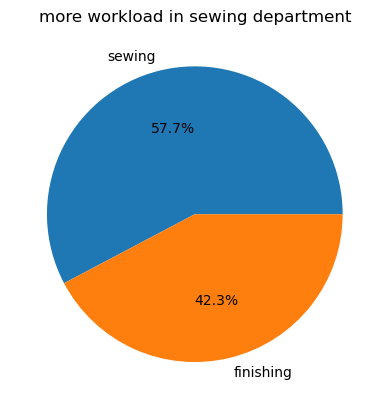

In [670]:
s=df['DEPARTMENT'].value_counts()
plt.pie(s.values,labels=s.index,autopct='%1.1f%%')
plt.title('more workload in sewing department')
plt.show()

As we can see from the graph there is more workload on the sewing department than finishing deparment this can also have an impact on the productivity of the workers.

In [671]:
df. describe()

,TEAM,TARGETED_PRODUCTIVITY,SMV,WIP,OVER_TIME,INCENTIVE,IDLE_TIME,IDLE_MEN,NO_OF_STYLE_CHANGE,NO_OF_WORKERS,ACTUAL_PRODUCTIVITY
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


* After checking for inconsistencies in the data, we are interpreting this output to understand the central tendency, spread, and distribution of the numerical data. 
* It helps in identifying patterns, outliers, or anomalies in the dataset, which may require further investigation or data cleaning.

### Feature Transformation

The method of producing new, significant variables from the available data to improve a machine learning model's performance is known as feature Transformation. 

In [672]:
df['PRODUCTIVITY']=df['TARGETED_PRODUCTIVITY']-df['ACTUAL_PRODUCTIVITY']

* It creates a new column called "PRODUCTIVITY" in the DataFrame.
* This new column measures the difference between the expected productivity (TARGETED_PRODUCTIVITY) and the actual productivity (ACTUAL_PRODUCTIVITY) for each row in the dataset.
* It helps you see how much the actual productivity deviates from the target or goal.

In [673]:
df['PRODUCTIVITY']

0      -0.140725
1      -0.136500
2      -0.000570
3      -0.000570
4      -0.000382
          ...   
1192    0.121667
1193    0.074375
1194    0.024375
1195    0.244111
1196    0.305278
Name: PRODUCTIVITY, Length: 1197, dtype: float64

In [674]:
(df['PRODUCTIVITY']>0).value_counts()

False    875
True     322
Name: PRODUCTIVITY, dtype: int64

In [675]:
df['CLASSIFICATION'] = df['PRODUCTIVITY'].apply(lambda x: 1 if x > 0 else 0)

We are classifying this as it will be useful for further analysis or modeling to categorize data points into meaningful groups based on their productivity performance.

* If the "PRODUCTIVITY" value is greater than 0 (indicating that actual productivity is higher than the target),  assigning a value of 1. 
* If the "PRODUCTIVITY" value is not greater than 0 (indicating that actual productivity is at or below the target),  assigning a value of 0.

In [676]:
df['CLASSIFICATION'].value_counts()

0    875
1    322
Name: CLASSIFICATION, dtype: int64

We are examining the distribution of values in the "CLASSIFICATION" column after categorizing the data. 
we can see that the data is unbalanced with more instances baised towards '0'.

### Using Get Dummies 

In [677]:
df_dummy=pd.get_dummies(
    df,
    prefix_sep='_',
    dummy_na=False,
    drop_first=False,
    columns=['DEPARTMENT','DAY','QUARTER'],
    dtype='int32'
    
)
df_dummy

,DATE,TEAM,TARGETED_PRODUCTIVITY,SMV,WIP,OVER_TIME,INCENTIVE,IDLE_TIME,IDLE_MEN,NO_OF_STYLE_CHANGE,...,DAY_Monday,DAY_Saturday,DAY_Sunday,DAY_Thursday,DAY_Tuesday,DAY_Wednesday,QUARTER_Quarter1,QUARTER_Quarter2,QUARTER_Quarter3,QUARTER_Quarter4
0,1/1/2015,8,0.80,26.16,1108.0,7080,98,0.0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,1/1/2015,1,0.75,3.94,NaN,960,0,0.0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,1/1/2015,11,0.80,11.41,968.0,3660,50,0.0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1/1/2015,12,0.80,11.41,968.0,3660,50,0.0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,1/1/2015,6,0.80,25.90,1170.0,1920,50,0.0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,10,0.75,2.90,NaN,960,0,0.0,0,0,...,0,0,0,0,0,1,0,1,0,0
1193,3/11/2015,8,0.70,3.90,NaN,960,0,0.0,0,0,...,0,0,0,0,0,1,0,1,0,0
1194,3/11/2015,7,0.65,3.90,NaN,960,0,0.0,0,0,...,0,0,0,0,0,1,0,1,0,0
1195,3/11/2015,9,0.75,2.90,NaN,1800,0,0.0,0,0,...,0,0,0,0,0,1,0,1,0,0


We are creating a new dataframe by applying get dummies function on classification columns like day, department,quarter to create sub columns based on the classification as shown above. 

### Feature Target Seperation

In [678]:
features=df_dummy.drop(['ACTUAL_PRODUCTIVITY','PRODUCTIVITY','CLASSIFICATION','WIP','DATE'],axis=1)
features
target=df_dummy['CLASSIFICATION']
target

0       0
1       0
2       0
3       0
4       0
       ..
1192    1
1193    1
1194    1
1195    1
1196    1
Name: CLASSIFICATION, Length: 1197, dtype: int64

* We are dropping the specific columns ('ACTUAL_PRODUCTIVITY', 'PRODUCTIVITY', 'CLASSIFICATION', 'WIP', 'DATE') because they are not  relevant for our analysis.We are isolating the remaining columns as our input features
* We are creating target by selecting the 'CLASSIFICATION' column from the DataFrame df_dummy.
* This column is representing the target that the model tries to predict.

## 2. Training and Standardization

### Training the Dataset

* It's the process of teaching a machine learning model using data to enable it to make predictions or classifications.


In [679]:
df_dummy.shape

(1197, 26)

In [680]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=1)

* We can have split types of 70/30 , 80/20 or 60/40  train-test split but it depends on factors like data size, quality, model complexity, and domain knowledge.
* We are using 80/20 split as the data set contains only 1197 instances we are prioritising train data is crucial for the model. Giving more data to the model will train the model to perform efficiently.






In [681]:
X_train

,TEAM,TARGETED_PRODUCTIVITY,SMV,OVER_TIME,INCENTIVE,IDLE_TIME,IDLE_MEN,NO_OF_STYLE_CHANGE,NO_OF_WORKERS,DEPARTMENT_finishing,...,DAY_Monday,DAY_Saturday,DAY_Sunday,DAY_Thursday,DAY_Tuesday,DAY_Wednesday,QUARTER_Quarter1,QUARTER_Quarter2,QUARTER_Quarter3,QUARTER_Quarter4
994,1,0.60,26.66,6840,38,0.0,0,0,57.0,0,...,0,0,1,0,0,0,1,0,0,0
584,8,0.70,4.15,960,0,0.0,0,0,8.0,1,...,0,0,0,0,1,0,1,0,0,0
824,6,0.80,2.90,1440,0,0.0,0,0,12.0,1,...,0,0,0,0,0,1,0,0,1,0
323,9,0.80,26.16,10620,63,0.0,0,0,59.0,0,...,1,0,0,0,0,0,0,0,1,0
1106,3,0.80,4.60,1440,0,0.0,0,0,12.0,1,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,8,0.35,4.15,1440,0,0.0,0,0,12.0,1,...,0,0,0,0,0,1,0,1,0,0
905,12,0.80,15.26,4080,50,0.0,0,0,34.0,0,...,0,0,0,0,1,0,0,0,0,1
1096,9,0.75,18.79,3480,45,0.0,0,0,51.0,0,...,0,1,0,0,0,0,1,0,0,0
235,5,0.70,20.79,10440,0,0.0,0,0,58.0,0,...,0,0,0,0,1,0,0,1,0,0


### Standardization

Because the models in this notebook are sensitive to scale differences, we should start by eliminating differences across predictors/features.To do so, we'll standardise the values of each variable.
To accomplish this, we will use the popular sklearn library's'standard scaler'. This library offers many of the typical functions needed for analytics. Our variables will be standardised using the usual scaler function. To accomplish this, we must first train the scaler on training data and then apply the learned scaler to standardise both the training and validation sets.

In [682]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

# Transform the predictors of training and validation sets
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

### Data Imbalance

Data imbalance a common challenge in machine learning and data analysis when one class or category in the dataset significantly outnumbers the other.
From our previous analysis we could see that there were imbalances in the target variable which we calculated.

In [683]:
df_dummy['CLASSIFICATION'].value_counts()

0    875
1    322
Name: CLASSIFICATION, dtype: int64

Since the target imbalance is not extremely skewed, we are planning to train the models on the unbalanced dataset using ADASYN resampling technique which adaptively generates synthetic samples on the training dataset.

In [684]:
adasyn = ADASYN(sampling_strategy='auto', random_state=42, n_jobs=-1)

In [685]:
X_res, y_res = adasyn.fit_resample(X_train, y_train)

In [686]:
y_train

994     0
584     0
824     0
323     0
1106    0
       ..
715     0
905     0
1096    1
235     1
1061    0
Name: CLASSIFICATION, Length: 957, dtype: int64

### Metric Selection

Based on the above data exploration, cleaning and analysis we have balanced data classes hence we are considering accuracy as metric.



## 3. Modelling

The choice of machine learning algorithms in a garment worker productivity  dataset would be influenced by nature of the problem and the dataset.
As We are categorizing garment worker productivity , which is a typical classification problem. Therefore, algorithms like Logistic Regression, Decision Trees, and Support Vector Machines (SVMs) are ideal choices. Logistic Regression, in particular, is well-suited for binary classification, making it a strong candidate for this task.

we are using the classification models listed below.

* Decision Trees
* Support Vector Machines (SVC)
* Logistic Regression
* XG Boost
* MLP Classifier
* Random Forest



### Decision Tree

In [687]:
clf=DecisionTreeClassifier(random_state=1)
_=clf.fit(X_res,y_res)

In [688]:
y_pred = clf.predict(X_test) 

In [689]:
ac=accuracy_score(y_test,y_pred)
print("Decision Tree Accuracy:", ac)

Decision Tree Accuracy: 0.775


### SVC

In [690]:
clf1=SVC(random_state=1)
_=clf1.fit(X_res,y_res)

In [691]:
y_pred = clf1.predict(X_test) 

In [692]:
ac=accuracy_score(y_test,y_pred)
print("SVC Accuracy:", ac)

SVC Accuracy: 0.6625


### Logistic Regression

In [693]:
clf2=LogisticRegression(random_state=1)
_=clf2.fit(X_res,y_res)

In [694]:
y_pred=clf2.predict(X_test)

In [695]:
ac=accuracy_score(y_test,y_pred)
print("Logistic Regression Accuracy:", ac)

Logistic Regression Accuracy: 0.6583333333333333


Decision Tree:

* The Accuracy of the decision tree model is 77.5%
    
* Decision Tree achieved the highest accuracy among the models. It performed reasonably well in classifying or predicting garment worker productivity on the test dataset.

SVC (Support Vector Classifier):

* The Accuracy of the Support Vector Classifier  model is Accuracy: 66.25%
    
* SVC had a lower accuracy compared to the Decision Tree. It's essential to note that the default hyperparameters of SVC might not be optimal for this dataset, which is why hyperparameter tuning is necessary.

Logistic Regression:

* The Accuracy of the logistic Regression model is Accuracy: 65.83%
    
* Logistic Regression had the lowest accuracy. Like SVC, it's likely that the default hyperparameters are not ideal for this specific task.


### XG Boost Classifier

In [696]:
xgb_classifier = XGBClassifier(random_state=1)
_= xgb_classifier.fit(X_res,y_res)

In [697]:
y_pred=xgb_classifier.predict(X_test)

In [698]:
ac=accuracy_score(y_test,y_pred)
print("XG Boost Accuracy:", ac)

XG Boost Accuracy: 0.7583333333333333


### Neural network

In [699]:
MLP=MLPClassifier(max_iter=10000,random_state=1)
_=MLP.fit(X_res,y_res)

In [700]:
y_pred=MLP.predict(X_test)

In [701]:
ac=accuracy_score(y_test,y_pred)
print("Neural Network Accuracy:", ac)

Neural Network Accuracy: 0.7333333333333333


### Random Forest Classifer

In [702]:
RFC=RandomForestClassifier(random_state=1)
_=RFC.fit(X_res,y_res)

In [703]:
y_pred=RFC.predict(X_test)

In [704]:
ac=accuracy_score(y_test,y_pred)
print("Random Forest Classifer Accuracy:", ac)

Random Forest Classifer Accuracy: 0.8125


Among the above other three classifier algorithms Random Forest Classifier has the Highest Accuracy 0.8125 over all other models befoe hyper parameter tuning, howver after hyperparameter tuning model accuracy comparatively increase or decrease based on Overfitting or Undefitting of the Model.

## 4. Hyperparamter Tuning

As lower accuracy  is observed in the above models. In order to enhance the performance of the models, we are planning to perform  hyperparameter tuning.
This involves systematically searching for the best combination of hyperparameters, such as the depth of decision trees, the choice of kernel in SVC, or the regularization strength in logistic regression. By fine-tuning these hyperparameters, we can potentially increase the effectiveness of the models, making them more reliable for predicting garment worker productivity.



## Grid and Randomized Search

Grid Search and Randomized Search are techniques used for hyperparameter tuning in machine learning. These techniques help optimize the performance of a model by systematically searching and testing different combinations of hyperparameters. 
The Random search performs faster than Grid search for hyper perameter tuning as combinations of the hyper perameter combinations are randomly sampled from the specified search space. Additionally the random search evaluates multiple combinations in parallel and the random search will stop searching when it satisfies the correct combination which will reduce the processing time.

### Grid and Randomized Search for Decision Tree

In [708]:
score_measure = 'accuracy'
k_fold = 10
# Considering the Parameters
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [int(x) for x in np.linspace(1, 40000, 50)], 
    'max_leaf_nodes': [2, 5, 10, 20, 30,40,50,60,70],
    'min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(
    DecisionTreeClassifier(random_state=1), 
    param_grid, cv=k_fold, 
    scoring=score_measure,
    n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 

gridSearch.fit(X_res, y_res)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestAccuracyTree = gridSearch.best_estimator_

accuracy score:  0.837623614024573
parameters:  {'criterion': 'gini', 'max_depth': 817, 'max_leaf_nodes': 70, 'min_impurity_decrease': 0.001, 'min_samples_split': 10}


In [709]:
k_fold=10
param_dist = {
     'criterion': ['gini', 'entropy', 'log_loss'],
    'max_leaf_nodes': [None, 5, 10, 20, 30, 40],
    'max_depth': [2, 5, 10, 20, 30, 40,50,60,70],
    'min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100],
    'min_samples_leaf': [1, 2, 4],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01]
}

model = DecisionTreeClassifier(random_state=1)


randomSearch = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, cv=k_fold, scoring=score_measure, n_jobs=-1, random_state=1)

randomSearch.fit(X_res, y_res)

best_params = randomSearch.best_params_
best_estimator = randomSearch.best_estimator_

print(score_measure, 'score:', randomSearch.best_score_)
print('Best parameters:', best_params)

bestAccuracyTree = randomSearch.best_estimator_

accuracy score: 0.8213365298172011
Best parameters: {'min_samples_split': 40, 'min_samples_leaf': 2, 'min_impurity_decrease': 0, 'max_leaf_nodes': 30, 'max_depth': 30, 'criterion': 'log_loss'}


### Grid and Randomized Search for LOG GD

In [710]:
score_measure = 'accuracy'
k_fold = 10


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000],  
    'penalty': ['l1', 'l2'], 
    'solver': ['liblinear'], 
}

# Initializing the  GridSearchCV for the Logistic Regression
gridSearch = GridSearchCV(
    LogisticRegression(random_state=1),
    param_grid,
    cv=k_fold,
    scoring=score_measure,
    n_jobs=-1 
)

gridSearch.fit(X_res, y_res)

best_params = gridSearch.best_params_
best_estimator = gridSearch.best_estimator_

print(score_measure, 'score:', gridSearch.best_score_)
print('Best parameters:', best_params)

# storing the best Logistic Regression model:
bestLogisticRegression = gridSearch.best_estimator_

accuracy score: 0.6882479272799921
Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [714]:
# Defining the hyperparameter search space for Logistic Regression
k_fold=10
param_dist = {
    'C': [0.001, 0.01, 0.1, 1],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [10000, 200000, 300000, 400000, 500000],
}

# Creating a Logistic Regression model
model = LogisticRegression(random_state=1)

# Initializing RandomizedSearchCV
randomSearch = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10000, cv=k_fold, scoring=score_measure, n_jobs=-1, random_state=1)

# Fitting the RandomizedSearchCV to  training data
randomSearch.fit(X_res, y_res)

# Get the best parameters and best estimator
best_params = randomSearch.best_params_
best_estimator = randomSearch.best_estimator_

# Printing the best parameters and their corresponding performance
print(score_measure, 'score:', randomSearch.best_score_)
print('Best parameters:', best_params)

bestAccuracyLogisticrand = randomSearch.best_estimator_

accuracy score: 0.6868244930576367
Best parameters: {'solver': 'saga', 'penalty': 'l1', 'max_iter': 10000, 'C': 1}


### Grid and Randomized Search for SVM

In [713]:
# Defining the hyperparameter for the SVM 

param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['rbf','poly','linear'],  # Kernel type
    'degree': [2, 3, 4,'scale', 'auto'],  # Degree of the polynomial kernel (if 'poly' is chosen)
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1], # Kernel coefficient (if 'rbf' or 'poly' is chosen)
    
}

# Defining the Model (SVC for classification)
model = SVC(random_state=1)



# Initializing the  GridSearchCV for SVM
grid_search = GridSearchCV(
    model, param_grid=param_grid, cv=k_fold, scoring=score_measure, n_jobs=-1
)

# Fitting the GridSearchCV the split data
grid_search.fit(X_res, y_res)

# Getting the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the best model on  test data
test_accuracy = best_estimator.score(X_test, y_test)

# Printing the best parameters and test accuracy
print(score_measure, 'score:', grid_search.best_score_)
print('Best Parameters:', best_params)
print('Test Accuracy:', test_accuracy)

accuracy score: 0.8573169513535112
Best Parameters: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Test Accuracy: 0.6958333333333333


In [624]:
# Defining the  hyperparameter search space for SVM
k_fold=10
param_dist = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0.1, 1, 10, 'scale', 'auto'],
    'degree': [2, 3, 4, 5],
}

# Create an SVM classifier
model = SVC(random_state=1)


randomSearch = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, cv=k_fold, scoring=score_measure, n_jobs=-1, random_state=1)

randomSearch.fit(X_res, y_res)

best_params = randomSearch.best_params_
best_estimator = randomSearch.best_estimator_

print(score_measure, 'score:', randomSearch.best_score_)
print('Best parameters:', best_params)

bestAccuracySVM = randomSearch.best_estimator_

accuracy score: 0.8269303765857557
Best parameters: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'C': 10}


### Grid and Random Search XG Boost Classifer 

In [633]:
# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

# Create an XGBoost classifier
xgb_classifier = XGBClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(xgb_classifier, param_grid=param_grid, cv=5, n_jobs=-1,)
grid_search.fit(X_res, y_res)

# Get the best hyperparameters from grid search
best_params = grid_search.best_params_
print("Best hyperparameters from grid search:", best_params)

# Evaluate the model with the best hyperparameters from grid search
best_grid_model = grid_search.best_estimator_
y_grid_pred = best_grid_model.predict(X_test)

# Calculate the accuracy for grid search
accuracy_grid = accuracy_score(y_test, y_grid_pred)
print("Accuracy (Grid Search):", accuracy_grid)

# Define hyperparameters for random search
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [ 0.9, 1.0]
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=1)
random_search.fit(X_res, y_res)

# Get the best hyperparameters from random search
best_random_params = random_search.best_params_
print("Best hyperparameters from random search:", best_random_params)

# Evaluate the model with the best hyperparameters from random search
best_random_model = random_search.best_estimator_
y_random_pred = best_random_model.predict(X_test)

# Calculate the accuracy for random search
accuracy_random = accuracy_score(y_test, y_random_pred)
print("Accuracy (Random Search):", accuracy_random)


Best hyperparameters from grid search: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}
Accuracy (Grid Search): 0.8125
Best hyperparameters from random search: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.2}
Accuracy (Random Search): 0.8


### Grid and Random Search Neural Network Classifer 

In [636]:
# Define hyperparameters for grid search
param_grid = {
    'hidden_layer_sizes': [(50,), (100, 50), (100, 100, 50)],
    'alpha': [ 0.001, 0.01],
    'activation': ['logistic', 'tanh', 'relu']
}

# Create an MLPClassifier
mlp_classifier = MLPClassifier(max_iter=10000,random_state=1)

# Create a GridSearchCV object
grid_search = GridSearchCV(mlp_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_res, y_res)


# Get the best hyperparameters from grid search
best_params = grid_search.best_params_
print("Best hyperparameters from grid search:", best_params)

# Evaluate the model with the best hyperparameters from grid search
best_grid_model = grid_search.best_estimator_
y_grid_pred = best_grid_model.predict(X_test)

# Calculate the accuracy for grid search
accuracy_grid = accuracy_score(y_test, y_grid_pred)
print("Accuracy (Grid Search):", accuracy_grid)

# Define hyperparameters for random search
param_dist = {
    'hidden_layer_sizes': [(50,), (100, 50), (100, 100, 50)],
    'alpha': [0.0001, 0.01],
    'activation': ['logistic', 'tanh', 'relu']
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(mlp_classifier, param_distributions=param_dist, n_iter=10, cv=5 ,n_jobs=-1)
random_search.fit(X_res, y_res)

# Get the best hyperparameters from random search
best_random_params = random_search.best_params_
print("Best hyperparameters from random search:", best_random_params)

# Evaluate the model with the best hyperparameters from random search
best_random_model = random_search.best_estimator_
y_random_pred = best_random_model.predict(X_test)

# Calculate the accuracy for random search
accuracy_random = accuracy_score(y_test, y_random_pred)
print("Accuracy (Random Search):", accuracy_random)


Best hyperparameters from grid search: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50)}
Accuracy (Grid Search): 0.7166666666666667
Best hyperparameters from random search: {'hidden_layer_sizes': (50,), 'alpha': 0.0001, 'activation': 'relu'}
Accuracy (Random Search): 0.725


### Grid and Random Search Random Forest Classifer 

In [643]:
# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_res, y_res)

# Get the best hyperparameters from grid search
best_params = grid_search.best_params_
print("Best hyperparameters from grid search:", best_params)

# Evaluate the model with the best hyperparameters from grid search
best_grid_model = grid_search.best_estimator_
y_grid_pred = best_grid_model.predict(X_test)

# Calculate the accuracy for grid search
accuracy_grid = accuracy_score(y_test, y_grid_pred)
print("Accuracy (Grid Search):", accuracy_grid)

# Define hyperparameters for random search
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [ 2, 4],
    'bootstrap': [True, False]
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1,random_state=1)
random_search.fit(X_res, y_res)

# Get the best hyperparameters from random search
best_random_params = random_search.best_params_
print("Best hyperparameters from random search:", best_random_params)

# Evaluate the model with the best hyperparameters from random search
best_random_model = random_search.best_estimator_
y_random_pred = best_random_model.predict(X_test)

# Calculate the accuracy for random search
accuracy_random = accuracy_score(y_test, y_random_pred)
print("Accuracy (Random Search):", accuracy_random)


Best hyperparameters from grid search: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy (Grid Search): 0.8125
Best hyperparameters from random search: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': False}
Accuracy (Random Search): 0.8041666666666667


For each case from the above models Grid search and Random search has been implemented to explore a range of hyperparameter combinations to yield out the best combination of parameters with their respective model accuracies.

## 5. Summary

One key insight is that feature selection and data preprocessing play a significant role in calculating and improving model performance.

We've implemented Decision Tree, SVM,Logistic Regression, XG Boost, Neural network and Random forest on our dataset and We've got the following conclusions:

The Accuracies that Each Model Generated are ..

- Decision Tree : 0.7750
- SVM : 0.6625
- Logistic Regression : 0.6583
- XG boost : 0.75833
- Neural Networks : 0.73333
- Random forest : 0.8125

Decision Tree:
the accuracy scores of Grid search and Random search for decision tree are 0.83762 and 0.82133.

SVM:
the accuracy scores of Grid search and Random search Support Vector Machine  are 0.85731 and 0.82693

Logistic Regression:
the accuracy scores of Grid search and Random search for Logistic Regression are 0.68824 and 0.68682

XG Boost :
the accuracy scores of Grid search and Random search for XG Boost are 0.8125 and 0.80.

Neural network :
the accuracy scores of Grid search and Random search for Neural network are 0.71666 and 0.725

Random forest :
the accuracy scores of Grid search and Random search for Random Forest are 0.81250 and 0.80416.

Based on the metric "accuracy" SVM Grid search has the best accuracy among all the models.The productivity of the Garment Workers is best predicted when SVM Grid Search has been used.